https://www.kaggle.com/kemical/kickstarter-projects
# Table of Content
- Imports
- Load Data
- Dataset Overview
- Summary of Dataset Overview Observations
- Visualization 
- Summary of Visualization Observations
- Cleaning
- Tools of the trade

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cl
import os

from laurentstar import Cleaner #My Modules
%matplotlib inline

# Load Data

In [2]:
file_path = os.path.join('data', 'ks-projects-201612.csv')
df = pd.read_csv(file_path, encoding="ISO-8859-1")

C:\Users\Laurent\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning:

Columns (13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.



In [9]:
df['ID '].nunique()

323750

# Dataset Overview

In [4]:
display(df.head())
display(df.info())
display(df.describe())

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,NaN
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,NaN
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323750 entries, 0 to 323749
Data columns (total 17 columns):
ID                323750 non-null int64
name              323746 non-null object
category          323745 non-null object
main_category     323750 non-null object
currency          323750 non-null object
deadline          323750 non-null object
goal              323750 non-null object
launched          323750 non-null object
pledged           323750 non-null object
state             323750 non-null object
backers           323750 non-null object
country           323750 non-null object
usd pledged       319960 non-null object
Unnamed: 13       625 non-null object
Unnamed: 14       12 non-null object
Unnamed: 15       4 non-null object
Unnamed: 16       1 non-null float64
dtypes: float64(1), int64(1), object(15)
memory usage: 42.0+ MB


None

,ID,Unnamed: 16
count,3.237500e+05,1.0
mean,1.074943e+09,25.0
std,6.193352e+08,NaN
min,5.971000e+03,25.0
25%,5.375802e+08,25.0
50%,1.075818e+09,25.0
75%,1.611070e+09,25.0
max,2.147476e+09,25.0


In [5]:
df.columns

Index(['ID ', 'name ', 'category ', 'main_category ', 'currency ', 'deadline ',
       'goal ', 'launched ', 'pledged ', 'state ', 'backers ', 'country ',
       'usd pledged ', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16'],
      dtype='object')

### <span style="color:blue">Observations</span>
    
    - Unnamed: 13, 14, 15, 16 are all blank when opened with Notepad++ and Microsoft Excel. The 2018 version of the dataset
      has 3 additional columns representing a country and how much it pledged. These columns may have been 
      accidentally picked up using ISO-8859-1 encoding when loading the data
    - Based on the values observation the goal should be a numeric column but the actual values are of different currency.
    - All column names have white space at the end.

In [81]:
display(df[df['backers '].str.isnumeric() == False][['backers ', 'state ', 'pledged ', 'launched ']].head())

print("Number of observation that aren't numeric:", df[df['backers '].str.isnumeric() == False]['backers '].count())

print("Number of unique observations that aren't numeric:", 
      df[df['backers '].str.isnumeric() == False]['backers '].nunique(), '\n')

print("Unique Observations that aren't numeric:\n", 
      df[df['backers '].str.isnumeric() == False]['backers '].unique())

,backers,state,pledged,launched
1454,failed,4262,2016-01-03 00:56:46,15000
1563,failed,3984,2014-08-09 03:16:02,13730
1794,failed,525,2011-11-21 23:25:46,5000
1931,failed,0,2014-08-21 19:56:10,6300
2420,successful,3035,2013-02-25 21:11:57,3000


Number of observation that aren't numeric: 624
Number of unique observations that aren't numeric: 9 

Unique Observations that aren't numeric:
 ['failed' 'successful' 'canceled' 'live' 'undefined' '2012-06-06 23:54:14'
 '2015-07-03 18:23:23' '2014-02-05 02:06:20' '88619.2']


### <span style="color:blue">Observations</span>
    - the majority of projects are funded by USA Dollars
    - There seems to be a mistake in the dataset. Whenever a backers string observation is not potentially numeric it has a 
      the status of the kickstarter which are the values of the "state " feature. Certain observations seems to be shifted 
      to the next column

In [82]:
print('Total number of projects:', df.shape[0])
print('Number of projects in 2007:', df[df['launched '].str.contains(pat = '2007-')]['launched '].count())
print('Number of projects in 2008:', df[df['launched '].str.contains(pat = '2008-')]['launched '].count())
print('Number of projects in 2009:', df[df['launched '].str.contains(pat = '2009-')]['launched '].count())
print('Number of projects in 2010:', df[df['launched '].str.contains(pat = '2010-')]['launched '].count())
print('Number of projects in 2011:', df[df['launched '].str.contains(pat = '2011-')]['launched '].count())
print('Number of projects in 2012:', df[df['launched '].str.contains(pat = '2012-')]['launched '].count())
print('Number of projects in 2013:', df[df['launched '].str.contains(pat = '2013-')]['launched '].count())
print('Number of projects in 2014:', df[df['launched '].str.contains(pat = '2014-')]['launched '].count())
print('Number of projects in 2015:', df[df['launched '].str.contains(pat = '2015-')]['launched '].count())
print('Number of projects in 2016:', df[df['launched '].str.contains(pat = '2016-')]['launched '].count())

Total number of projects: 323750
Number of projects in 2007: 0
Number of projects in 2008: 0
Number of projects in 2009: 1324
Number of projects in 2010: 10491
Number of projects in 2011: 26175
Number of projects in 2012: 41090
Number of projects in 2013: 44756
Number of projects in 2014: 67602
Number of projects in 2015: 77182
Number of projects in 2016: 54499


In [112]:
df[~df['Unnamed: 13'].isna()].head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
1454,1008705746,Zephyra´s new full length,'As The World Collapses',Metal,Music,SEK,2016-02-02 00:56:46,15000,2016-01-03 00:56:46,4262,failed,14,SE,504.94765278,NaN,NaN,NaN
1563,1009317190,French Cuisine,A Traditional Experience,Cookbooks,Food,USD,2014-09-08 00:46:23,13730,2014-08-09 03:16:02,3984,failed,46,US,3984,NaN,NaN,NaN
1794,1010871699,The Beginners Guide to being Unsuicidal,the one act,Theater,Theater,USD,2011-12-31 23:25:46,5000,2011-11-21 23:25:46,525,failed,10,US,525,NaN,NaN,NaN
1931,1011687764,Best OnLine Classifieds,Ever / No More Spam,Web,Technology,USD,2014-09-20 19:56:10,6300,2014-08-21 19:56:10,0,failed,0,US,0,NaN,NaN,NaN
2420,101453314,Social Media Ruined My Life,A Short Film from Adam S Curtis,Shorts,Film & Video,USD,2013-03-14 20:11:57,3000,2013-02-25 21:11:57,3035,successful,42,US,3035,NaN,NaN,NaN


### <span style="color:blue">Observations</span>
    - The number of kickerstarter projects increased yearly. Since kickstarter was founded in April 28, 2009 there 
      shouldn't be any recorded project below this year and thankfully there isn't. 
    - the "Unnamed" columns are finally starting to make sense. The data shifted over to other columns and because they 
      never had named they were given defualt names.
    - It seems ID was the only column uneffected by the data shifting

In [81]:
display(df[df['state '].str.isnumeric() == True].head(5))
display(df[df['state '].str.isnumeric() == False]['state '].unique())
display(df['main_category '].unique())
display(df[df['currency '].str.len() > 3]['currency '].unique())

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
1454,1008705746,Zephyra´s new full length,'As The World Collapses',Metal,Music,SEK,2016-02-02 00:56:46,15000,2016-01-03 00:56:46,4262,failed,14,SE,504.94765278,NaN,NaN,NaN
1563,1009317190,French Cuisine,A Traditional Experience,Cookbooks,Food,USD,2014-09-08 00:46:23,13730,2014-08-09 03:16:02,3984,failed,46,US,3984,NaN,NaN,NaN
1794,1010871699,The Beginners Guide to being Unsuicidal,the one act,Theater,Theater,USD,2011-12-31 23:25:46,5000,2011-11-21 23:25:46,525,failed,10,US,525,NaN,NaN,NaN
1931,1011687764,Best OnLine Classifieds,Ever / No More Spam,Web,Technology,USD,2014-09-20 19:56:10,6300,2014-08-21 19:56:10,0,failed,0,US,0,NaN,NaN,NaN
2420,101453314,Social Media Ruined My Life,A Short Film from Adam S Curtis,Shorts,Film & Video,USD,2013-03-14 20:11:57,3000,2013-02-25 21:11:57,3035,successful,42,US,3035,NaN,NaN,NaN


array(['failed', 'canceled', 'successful', 'live', 'undefined',
       'suspended', '4488.01', '14309.36', '2011-06-04 01:17:48',
       '1800.5', '2016-06-28 21:36:59', '8609.6', '5600.65', '218.5',
       '10890.45', '3605.13', '2016-02-18 21:40:23', '9430.8', '9857.8',
       '1763.47', '11315.5', '218.75', '5656.43', '3285.11', '14032.77',
       '6983.18', '2016-02-22 21:57:30', '422.38', '130.16', '157323.21',
       '5275.01', '9210.69', '33.06', '1327.89', '1111.11', '5425.64',
       '25651.99', '6972.6', '7000.58', '3065.7', '2015-09-08 22:08:39',
       '2571.31', '63.01', '2013-01-03 03:45:14', '140.01',
       '2015-10-10 01:00:00', '2015-01-28 13:53:56', '35.01', '7253.01',
       '109301.56', '28751.5', '2016-02-15 17:24:27', '111307.22',
       '7326.46', '7281.1'], dtype=object)

array(['Publishing', 'Film & Video', 'Music', 'Food', 'Design', 'Crafts',
       'Games', 'Comics', 'Fashion', 'Theater', 'Art', 'Photography',
       'Technology', 'Dance', 'Journalism', 'Metal', 'Cookbooks', 'Web',
       'Shorts', 'Plays', 'Hardware', 'Playing Cards', 'World Music',
       'Mobile Games', 'Camera Equipment', 'Classical Music',
       'Conceptual Art', 'Nonfiction', 'Product Design', 'Documentary',
       'Video Games', ' 50 Years in the Making', 'Country & Folk',
       'Mixed Media', 'Comic Books', ' Retro Gaming art.', 'Places',
       'Events', 'Fiction', 'Tabletop Games', 'Video', 'Performance Art',
       'Small Batch', "Children's Books", 'Poetry', 'Public Art',
       'Art Books', 'Drama', 'Apparel', 'Sculpture', 'DIY', 'Hip-Hop',
       'Accessories', 'People', 'Webseries', 'Interactive Design',
       'Periodicals', 'Vegan', 'Indie Rock', 'Academic', 'Pop',
       ' M.ercury E.dition)', 'Faith', 'Jazz', 'Space Exploration',
       'Performances', 'Digital A

array(['Music', 'Food', 'Theater', 'Technology', 'Film & Video', 'Games',
       'Publishing', 'Design', 'Rock', 'Comics', 'Crafts', 'Photography',
       'Journalism', 'Fashion', 'Software', 'Dance', ' Be active!',
       'Nonfiction', ' clothing company', 'Painting',
       ' tango and culture', ' Religion ', 'Apparel'], dtype=object)

### <span style="color:blue">Observations</span>
https://www.kickstarter.com/projects/1871325530/french-cuisine-a-traditional-experience/comments   
    
    - Based on this url that leads to observation identified as number 1563 it seems the scraping process is incorrect. It 
      has "French Cruisine" as the name of the project but the full name is "French Cuisine; A Traditional Experience" 
      with the second half of the title put as the catagory. Its catagory should really be "Cookbooks" This shows why the 
      data has been shifted. 
https://www.kickstarter.com/projects/1871325530/french-cuisine-a-traditional-experience/description

    - This page leads to a list of catagories. There are 15 catagories 
|Catagories on the KickerStarter site| Catagories detected in the dataset|
|---|---|
|art|art|, 
|comics|comics|, 
|crafts|crafts|, 
|dance|dance|, 
|design|design|, 
|fashion|fashion|, 
|film & video|film & video|, 
|food|food|, 
|games|games|, 
|journalism|journalism|. 
|music|music|, 
|photography|photography|, 
|technology|technology|, 
|theater|theater|
|Publishing|Publishing|

      Each of the catagories can be clicked to 
      expand a list that shown additional catagories under them. 
      

In [43]:
df[df['deadline '].str.len() <= 4]['deadline '].unique()

array(['SEK', 'USD', 'GBP', 'CAD', 'SGD', 'EUR', 'AUD', 'NZD', 'Art'],
      dtype=object)

In [14]:
display(df[df['usd pledged '].str.isalpha() == True]['usd pledged '].unique())
display(df[df['country '].str.isalpha() == True]['country '].unique())

array(['SE', 'US', 'GB', 'CA', 'SG', 'FR', 'AU', 'NL', 'IE', 'DE',
       'successful', 'failed', 'NZ', 'ES', 'IT'], dtype=object)

array(['GB', 'US', 'CA', 'NO', 'AU', 'IT', 'DE', 'IE', 'ES', 'MX', 'SE',
       'FR', 'NL', 'NZ', 'CH', 'AT', 'BE', 'DK', 'HK', 'LU', 'SG',
       'failed', 'successful'], dtype=object)

### <span style="color:blue">Observations</span>

https://www.kickstarter.com/discover/advanced?raised=1&ref=discovery_overlay&sort=end_date&staff_picks=1
    
    - This link goes to the staff pick of 75% nearly funded projects. At the bottom users can change what the currency they
      see is. There are 14 currency with identification names of 3 uppercase letters. There is no currency that doesn't 
      follow this format 

https://www.kickstarter.com/discover/advanced?raised=1&ref=discovery_overlay&sort=end_date&staff_picks=1
    
    - Every currency in this dataset is an option on kaggle but kaggle has additional options

==========================================================================================================================
    
    - Every country recorded only uses it Abbrivated name and there doesn't appear to be any exceptions.
 

# Summary of Dataset Overview Observations

   1. Unnamed: 13, 14, 15, 16 are all blank when opened with Notepad++ and Microsoft Excel. The 2018 version of the dataset
      has 3 additional columns representing a country and how much it pledged. These columns may have been accidentally 
      picked up using ISO-8859-1 encoding when loading the data
    
   2. Based on the values observation the goal should be a numeric column but the actual values are of different currency.
    
   3. All column names have white space at the end.
   
   4. the majority of projects are funded by USA Dollars
    
   5. There seems to be a mistake in the dataset. Whenever a backers string observation is not potentially numeric it has a 
      the status of the kickstarter which are the values of the "state " feature. Certain observations seems to be shifted 
      to the next column
    
   6. The number of kickerstarter projects increased yearly. Since kickstarter was founded in April 28, 2009 there 
      shouldn't be any recorded project below this year and thankfully there isn't. 
    
   7. the "Unnamed" columns are finally starting to make sense. The data shifted over to other columns and because they 
      never had named they were given defualt names.
    
   8. 
      https://www.kickstarter.com/projects/1871325530/french-cuisine-a-traditional-experience/comments        
      Based on this url that leads to observation number 1563 it seems the scraping process is incorrect. It has "French
      Cruisine" as the name of the project but the full name is "French Cuisine; A Traditional Experience" with the second
      half of the title put as the catagory. Its catagory should really be "Cookbooks" This shows why the data has been   
      shifted. 
      
   9. 
      https://www.kickstarter.com/projects/1871325530/french-cuisine-a-traditional-experience/description                  
      This page leads to a list of catagories. There are 15 catagories (art, comics, crafts, dance, design, fashion, film & 
      video, food, games, journalism. music, photography, technology, Theater). Each of the catagories can be clicked to 
      expand a list that shown additional catagories under them. 
   
   
   10. 
      https://www.kickstarter.com/discover/advanced?raised=1&ref=discovery_overlay&sort=end_date&staff_picks=1
      This link goes to the staff pick of 75% nearly funded projects. At the bottom users can change what the currency they
      see is. There are 14 currency with identification names of 3 uppercase letters. There is no currency that doesn't 
      follow this format.
   
   11.   
      https://www.kickstarter.com/discover/advanced?raised=1&ref=discovery_overlay&sort=end_date&staff_picks=1
      Every currency in this dataset is an option on kaggle but kaggle has additional options
   
   12. Every country recorded only uses it Abbrivated name and there doesn't appear to be any exceptions.

# Visualization

Number of unique categories: 770
Number of categories in top 10 percent: 77


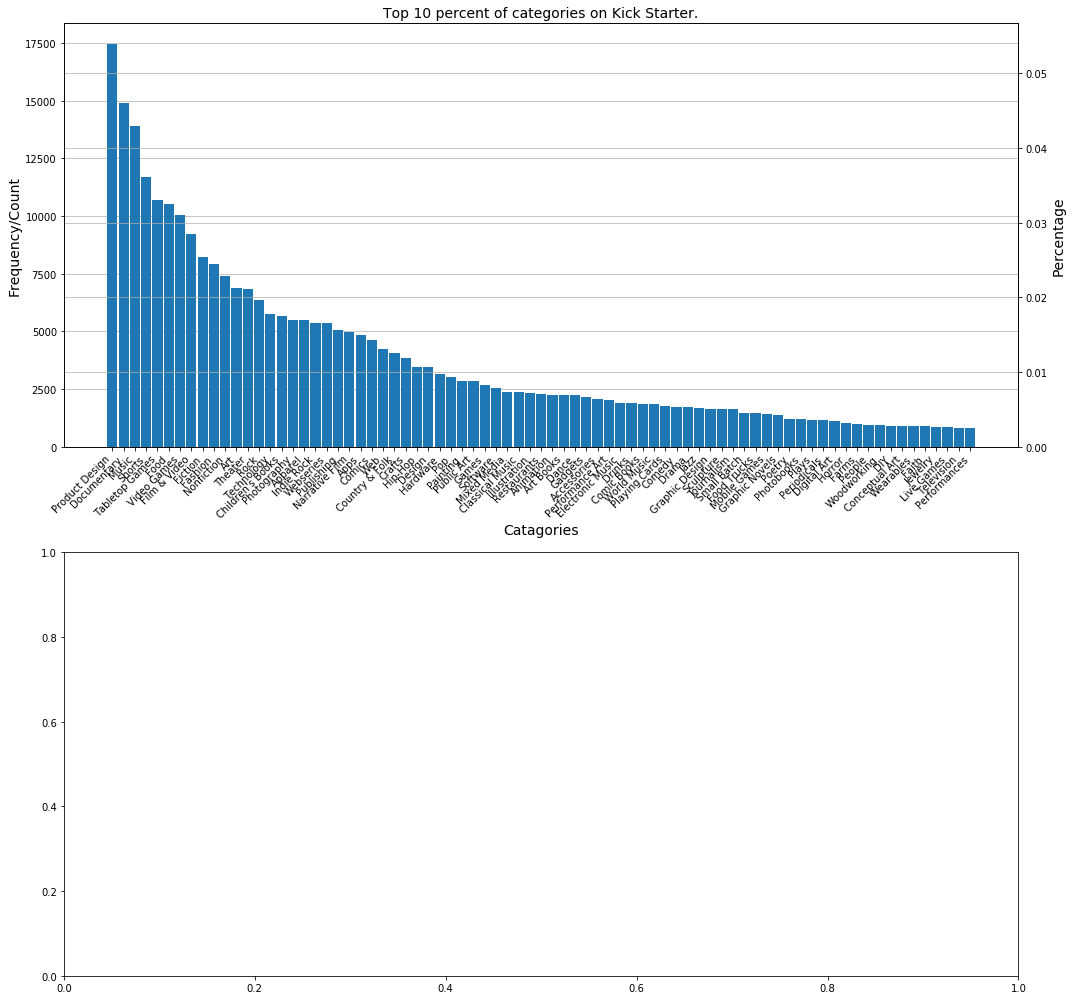

In [40]:
#Declaration
fig, ax = plt.subplots(nrows=2, figsize=(15,14))
length = df['category '].value_counts().size
percent = 10/100
x = df['category '].value_counts().index[:int(length*percent)]


print("Number of unique categories:", df['category '].nunique())
print("Number of categories in top 10 percent:", int(length*percent))


y = df['category '].value_counts()[:int(length*percent)]
ax[0].set_title("Top 10 percent of categories on Kick Starter.", fontsize=14)
ax[0].set_xlabel("Catagories", fontsize=14)
ax[0].set_ylabel("Frequency/Count", fontsize=14)
ax[0].bar(x=x, height=y, width=0.9)
ax[0].yaxis.grid(linestyle='-', linewidth=0.7)
ax[0].set_xticklabels(x, rotation=45, ha='right')

y = df['category '].value_counts(normalize=True)[:int(length*percent)]
ax[1] = ax[0].twinx()
ax[1].set_ylabel("Percentage", fontsize=14)
ax[1].yaxis.grid(linestyle='-', linewidth=0.7)

"""y = df['category '].value_counts(normalize=True)[:int(length*percent)]
ax[1].set_title("Top 10 percent of categories on Kick Starter.", fontsize=14)
ax[1].set_xlabel("Catagories", fontsize=14)
ax[1].set_ylabel("Percentage", fontsize=14)
ax[1].bar(x=x, height=y, width=0.9)
ax[1].yaxis.grid(linestyle='-', linewidth=0.7)
ax[1].set_xticklabels(x, rotation=45, ha='right')"""

plt.tight_layout();

Number of unique main categories: 120


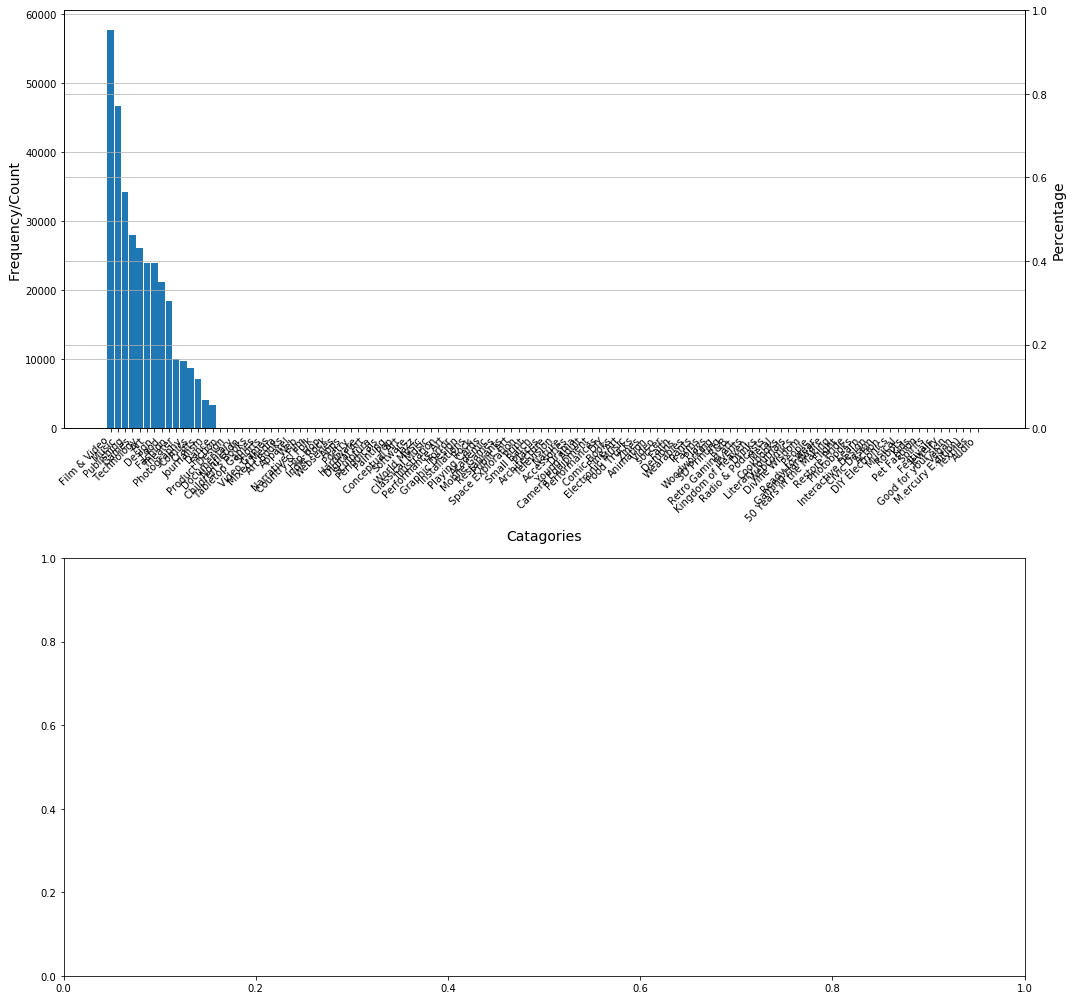

In [43]:
#Declaration
fig, ax = plt.subplots(nrows=2, figsize=(15,14))
x = df['main_category '].value_counts().index[:int(length*percent)]


print("Number of unique main categories:", df['main_category '].nunique())

y = df['main_category '].value_counts()
ax[0].set_xlabel("Catagories", fontsize=14)
ax[0].set_ylabel("Frequency/Count", fontsize=14)
ax[0].bar(x=x, height=y, width=0.9)
ax[0].yaxis.grid(linestyle='-', linewidth=0.7)
ax[0].set_xticklabels(x, rotation=45, ha='right')

y = df['main_category '].value_counts(normalize=True)
ax[1] = ax[0].twinx()
ax[1].set_ylabel("Percentage", fontsize=14)
ax[1].yaxis.grid(linestyle='-', linewidth=0.7)


'''
y = df['main_category '].value_counts(normalize=True)[:int(length*percent)]
ax[1].set_xlabel("Catagories", fontsize=14)
ax[1].set_ylabel("Percentage", fontsize=14)
ax[1].bar(x=x, height=y, width=0.9)
ax[1].yaxis.grid(linestyle='-', linewidth=0.7)
ax[1].set_xticklabels(x, rotation=45, ha='right')'''

plt.tight_layout();

### <span style="color:blue">Observations</span>
    - the majority of catagories were not recorded to generalize. Instead they appear to represent very specific 
      products/ideas/events only appearing 1 time in the entire dataset.
    - Main catagory has 120 unique values. This is ~ 1/7 of the "catagory " unique values. This may be a better 
      representation of what the kick starter project catagorizes as.

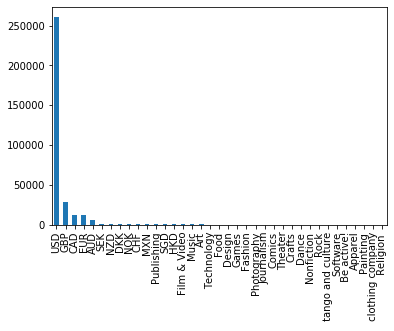

In [84]:
df['currency '].value_counts().plot('bar');

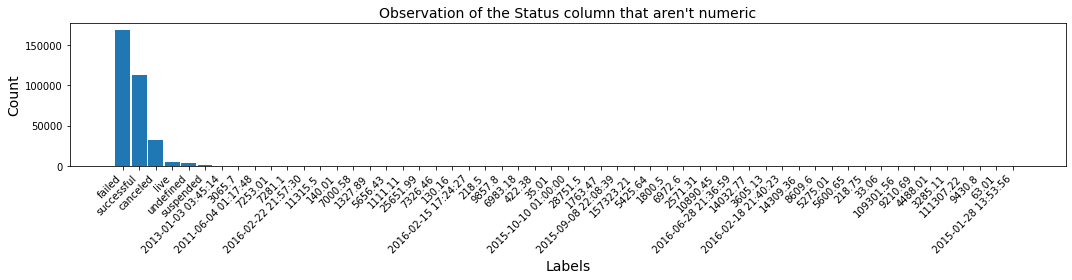

In [113]:
fig, ax = plt.subplots(figsize=(15,4))
x = df[df['state '].str.isnumeric() == False]['state '].value_counts().index
y = df[df['state '].str.isnumeric() == False]['state '].value_counts()

ax.bar(x=x, height=y, width=0.9)
ax.set_xticklabels(x, rotation=45, ha='right')
ax.set_title("Observation of the Status column that aren't numeric", fontsize=14)
ax.set_ylabel("Count", fontsize=14)
ax.set_xlabel("Labels", fontsize=14)
plt.tight_layout();

### <span style="color:blue">Observations</span>
    - It seems the shifting of data is with multiple columns as the a few unique dates and currency are apart of the 
    "state " column.


# Summary of Visualization Observations

   1. It seems the shifting of data is within multiple columns as there are a few unique dates and currencies apart of the  "state " column.
   2. the majority of catagories were not recorded to generalize. Instead they appear to represent very specific 
      products/ideas/events only appearing 1 time in the entire dataset.
   3. "main catagory " column has 120 unique values. This is ~ 1/7 of the "catagory " unique values. This may be a better 
      representation of what the kick starter project catagorizes as.

# Cleaning

In [3]:
clean_df = df.copy()

In [4]:
# 'ID ' was the only column uneffected by the data shifting but it not very useful for analysis
clean_df.drop(columns=['ID '], axis=1, inplace=True)

In [5]:
# The column names have a weird whitespace at the end. Removing this. Using usd_pledged for readability.
clean_df.columns = [name.replace(' ', '') for name in clean_df.columns]
clean_df.rename(columns={'usdpledged': 'usd_pledged'}, inplace=True)

In [6]:
# Using my custom clean class methods built for cleaning this kickstarter dataset
clean = Cleaner()

In [7]:
# Apply the data shifting technique to all rows that are detected to have been shifted
clean_df = clean_df.fillna('').apply(lambda x: clean.shift_data_left(x), axis=1)

In [34]:
for _ in ['category', 'main_category', 'currency', 'state', 'country']:
    print(f'\033[1m{_}\033[0m: \n{list(clean_df[_].unique())} \n\n', end = '', sep = '')

category: 
['Poetry', 'Narrative Film', 'Music', 'Film & Video', 'Restaurants', 'Food', 'Drinks', 'Product Design', 'Documentary', 'Nonfiction', 'Indie Rock', 'Crafts', 'Games', 'Design', 'Comic Books', 'Art Books', 'Fashion', 'Theater', 'Comics', 'DIY', 'Webseries', 'Food Trucks', 'Public Art', 'Illustration', 'Photography', 'Pop', 'Tabletop Games', 'Art', 'Family', 'Fiction', 'Accessories', 'Rock', 'Hardware', 'Weaving', 'Gadgets', 'Web', 'Jazz', 'Ready-to-wear', 'Festivals', 'Video Games', 'Anthologies', 'Publishing', 'Shorts', 'Electronic Music', 'Radio & Podcasts', 'Apps', 'Cookbooks', 'Apparel', 'Metal', 'Hip-Hop', 'Periodicals', 'Dance', 'Technology', 'Painting', 'Software', 'World Music', 'Photobooks', 'Drama', 'Architecture', 'Young Adult', 'Mobile Games', 'Flight', 'Fine Art', 'Action', 'Playing Cards', 'Makerspaces', 'Punk', "Children's Books", 'People', 'Ceramics', 'Fabrication Tools', 'Comedy', 'Performances', 'Sculpture', 'Animation', 'Sound', 'Stationery', "Farmer's Mark

In [39]:
display(clean_df[clean_df['country'] == 'N,"0'].head())
clean_df[clean_df['country'] == 'N,"0'].shape

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,Unnamed:13,Unnamed:14,Unnamed:15,Unnamed:16
150,STREETFIGHTERZ WHEELIE MURICA,Film & Video,Film & Video,USD,2014-09-20 06:59:00,6500,2014-08-06 21:28:36,555,undefined,0,"N,""0",,,,,
287,Duncan Woods - Chameleon EP,Music,Music,AUD,2015-08-25 23:00:00,4500,2015-08-04 12:05:17,4767,undefined,0,"N,""0",,,,,
549,The Making of Ashley Kelley's Debut Album,Music,Music,USD,2015-04-09 21:06:13,3500,2015-03-10 20:06:13,3576,undefined,0,"N,""0",,,,,
561,Butter Side Down Debut Album,Music,Music,USD,2015-11-26 10:59:00,6000,2015-11-02 22:09:19,7007.8,undefined,0,"N,""0",,,,,
650,Chase Goehring debut EP,Music,Music,USD,2016-03-21 06:00:00,3000,2016-02-23 03:09:49,3660.38,undefined,0,"N,""0",,,,,


(3790, 16)

In [38]:
clean_df[clean_df['country'] == '0']

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,Unnamed:13,Unnamed:14,Unnamed:15,Unnamed:16
64484,CD: Heartsong Harmonics,Marc & Mary sing together at last!,Music,Music,USD,2015-11-03 00:59:00,7085,2015-09-14 23:55:04,7470,undefined,0,"N,""0",,,,
85619,Everyday Beautiful,a day in the life of a champion,Film & Video,Film & Video,USD,2015-03-27 01:00:00,2000,2015-02-25 06:52:16,0,undefined,0,"N,""0",,,,
98614,Hana Zara's new album,The North (2015),Music,Music,USD,2015-03-03 02:04:57,3000,2015-01-17 02:04:57,3280,undefined,0,"N,""0",,,,
123506,Celebrating Joni Mitchell,Songs by & about her + Stories,Music,Music,CAD,2015-10-11 00:47:47,5000,2015-09-11 00:47:47,6323,undefined,0,"N,""0",,,,
159427,Legal Highs,The Sobering Truth,Film & Video,Film & Video,GBP,2014-11-05 03:00:57,5000,2014-10-16 03:00:57,0,undefined,0,"N,""0",,,,
163067,Puppy Training Steps,Right and Wrong,Film & Video,Film & Video,USD,2015-04-24 22:07:03,5000,2015-03-25 21:07:03,0,undefined,0,"N,""0",,,,
177636,Adventure to Peru's Sacred Valley,Recording Soundtracks,Music,Music,USD,2015-03-21 21:13:23,2200,2015-03-02 22:14:34,2503,undefined,0,"N,""0",,,,


# Experiment

In [8]:
import re
expression = {}
expression['country'] = re.compile(r'([A-Z]){2}')
expression['state'] = ['failed', 'canceled', 'successful', 'live', 'undefined', 'suspended']
expression['deadline & launched'] = re.compile(r'[\d]{4}-[\d]{2}-[\d]{2} [\d]{2}:?[\d]{2}:?[\d]{2}:?') 
expression['currency'] = re.compile(r'([A-Z]){3}') 
expression['main_category'] = ['Art', 'Comics', 'Crafts', 'Dance', 'Design', 'Fashion', 'Film & Video', 
                                         'Food', 'Games', 'Journalism', 'Music', 'Photography', 'Technology', 'Theater', 
                                         'Publishing']


def shift_data_left(row):
        """
        This function checks if there are signs of right shifted data. If right shifted data is detected, 
        the data is shifted to the left to be corrected. If the data was not right shifted no action will be taken.

        This method should be called on a matrix the is mostly sorted. 

        Parameters
        ----------
            row : an pandas series or row from a pandas dataframe

        Big-O-Notation Estimate
        -----------------------
            Best:         O(n)    //Fair-er-ish....
            Average:      O(n)    //Fair...
            Worst:        O(n^2)  //OUCH!!!

        Returns
        -------
            pandas-series, 1D-array, dataframe-row : The dataframe row with swapped around data.


        INPUT <<<<      df = pd.DataFrame({'numbers' : [1, 2, 3, 4, 'i'], 'letters' : ['a', 'b', 'c', 'd', 5]}) 
                        data_swap(df.iloc[0])

        OUTPUT >>>>     {'numbers' : [1, 2, 3, 4, 5], 'letters' : ['a', 'b', 'c', 'd', 'i']}
        """
        
        
        shift = 0 # The number of times the data was potentially shifted to the right. This is potentially not accually detected.
        cutoff = 0 # How many columns to ignore when checking data shift
        
        if str(row['Unnamed:16']).replace('.', '').isnumeric():
            shift = 4
            cutoff = 0
        elif str(row['Unnamed:15']).replace('.', '').isnumeric():
            shift = 3
            cutoff = 1
        elif str(row['Unnamed:14']).replace('.', '').isnumeric():
            shift = 2
            cutoff = 2
        elif str(row['Unnamed:13']).replace('.', '').isnumeric():
            shift = 1
            cutoff = 3
        
        # This create a list of column names in the correct order to check if data was shifted. The order is important for this check.
        cols = row.index[::-1][cutoff:] 
        
        # These if statement check if the data was shifted at any point it messes up the data wasn't shifted.
        if shift > 0:   
            
            # should contain a datatype that usd_pledged would have
            if str(row[cols[0]]).replace('.', '').isnumeric():
                
                if expression['country'].match(row[cols[1]]) != None:

                    #Should contain a datatype expected in the backers columns
                    if str(row[cols[2]]).replace('.', '').isnumeric():                    
                        
                        if row[cols[3]] in expression['state']:
                            
                            # Should contain a dataetype expected in pledged
                            if row[cols[4]].replace('.', '').isnumeric():
                                
                                if expression['deadline & launched'].match(row[cols[5]]) != None:
                                    
                                    # Check for datatype expected in goal
                                    if row[cols[6]].replace('.', '').isnumeric():
                                        
                                        if expression['deadline & launched'].match(row[cols[7]]) != None:
                                
                                            if expression['currency'].match(row[cols[8]]) != None:                         
                                                                                     
                                                if row[cols[9]] in expression['main_category']:                                                                                  
                                                    for i in range(shift):
                                                        row['name'] += ' ' + row[i+1]

                                                    for i in range(1, len(row)):
                                                        try:
                                                            row[i] = row[i+shift]
                                                            
                                                        except:
                                                            pass
                                        
                                                    for i in list(row[::-1][:4].index):                                                       
                                                        row[i] = ''
                                                    
        return row

In [ ]:
#shift_data_left(clean_df.iloc[1454]) 
#shift_data_left(clean_df.iloc[264243])
#shift_data_left(clean_df.iloc[7639])
#shift_data_left(clean_df.iloc[0])

# Tools of the trade

In [ ]:
#plt.gca().yaxis.grid(True)
#plt.xticks(rotation=45, ha='right');

- https://regexr.com/